In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

In [2]:
display(df)

,Month,Advertising Budget (X),Sales (Y)
0,1,3.0,6.0
1,2,5.0,9.0
2,3,2.0,4.0
3,4,7.0,10.0
4,5,8.0,12.0
5,6,1.0,3.0
6,7,4.0,7.0
7,8,6.0,8.0
8,9,9.0,13.0
9,10,10.0,15.0


### Task 1 : Implement OLS regression

- a. Use the data provided to fit a simple linear regression model using the
OLS method.

In [3]:
X = df['Advertising Budget (X)'].values.reshape(-1, 1)
X

array([[ 3.],
       [ 5.],
       [ 2.],
       [ 7.],
       [ 8.],
       [ 1.],
       [ 4.],
       [ 6.],
       [ 9.],
       [10.]])

In [4]:
# เพิ่ม column ที่มีแต่ 1 เข้าไปอีกหลัก เพราะไม่งั้นจะไม่มี intercept
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

X_with_intercept

array([[ 1.,  3.],
       [ 1.,  5.],
       [ 1.,  2.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  1.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  9.],
       [ 1., 10.]])

In [5]:
Y = df['Sales (Y)'].values.reshape(-1, 1)
Y

array([[ 6.],
       [ 9.],
       [ 4.],
       [10.],
       [12.],
       [ 3.],
       [ 7.],
       [ 8.],
       [13.],
       [15.]])

In [6]:
OLS = np.matmul((np.linalg.pinv(X_with_intercept)), Y)
OLS

array([[1.73333333],
       [1.26666667]])

So Alpha = 1.73 and Beta = 1.267

That's mean the simple regression of OLS method is `Y = ((1.267) * X) + 1.733`

---

b. Compute the regression coefficients (intercept and slope).

In [1]:
# Calculate the intercept (alpha)
alpha = (np.sum(Y) * np.sum(X**2) - np.sum(X * Y) * np.sum(X)) / (len(X) * np.sum(X**2) - np.sum(X)**2)

# Calculate the slope (beta)
beta = (len(X) * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (len(X) * np.sum(X**2) - np.sum(X)**2)

NameError: name 'np' is not defined

In [8]:
alpha, beta

(1.7333333333333334, 1.2666666666666666)

c. Write down the equation of the fitted line.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*TDlbLC_uEEPdO_hvOgITCA.png"/>

In [9]:
fitted_line_eq = f"y = {alpha:.2f} + {beta:.2f}x"
print(f"The equation of the fitted line is: {fitted_line_eq}")

The equation of the fitted line is: y = 1.73 + 1.27x


---

## 2. Interpret the Results:

* a. Explain the meaning of the slope and intercept in the context of this
problem.

จากสมการ Simple Regression คือ Y = α + 𝛽X

ในเชิงของ Slope (𝛽) - คือความชันของสมการซึ่งแปรผันตรงกับตัวแปร X

ในเชิงของ Intercept (α) - คือ ค่าคงที่ ไม่ขึ้นกับตัวแปรใด 

* b. Predict the sales if the advertising budget is $12,000.

In [21]:
budget = 12000

predicted = alpha + (beta * budget)

print(predicted, "฿")

15201.733333333334 ฿


---

## 3. Model Evaluation:

* a. Calculate the R-squared value to determine the goodness of fit for
your model.

<img src="https://miro.medium.com/v2/resize:fit:1200/1*_mVvAFVEGinHlijmmeWwzg.png"
height="150"/>

References from https://medium.com/analytics-vidhya/r-squared-formula-explanation-6dc0096ce3ba

In [15]:
SS_res = np.sum((Y - (alpha + beta * X))**2)
SS_tot = np.sum((Y - np.mean(Y))**2)

R_squared = 1 - (SS_res / SS_tot)

print(R_squared * 100, "%")

97.25691893215773 %


* b. Provide a brief interpretation of the R-squared value obtained.

R-squared คือมาตรที่เอาไว้วัดว่าโมเดล Regression ของเราสามารถอธิบายข้อมูลที่สังเกตได้ หรือก็คือมัน Fits กับข้อมูลของเรา

โดยปกติ R-squared มีค่าระหว่าง 0 - 100%

สรุปค่าที่เราได้คือ 97% หมายถึงว่า มีความต่างของ r ของทุกจุดกับเส้นกำลังสองน้อยมาก 

ดังนั้นหมายความว่าเส้น Simple Linear Regression ของเราสามารถอธิบายข้อมูลได้

* เพื่อความแน่ใจว่าโมเดลของเราดีจริงหรือไม่ เราจะทดลองพล็อตกราฟระหว่างจุด และสมการเส้นตรงของเรา ว่าตรงกับผลลัพธ์ R-squared หรือไม่

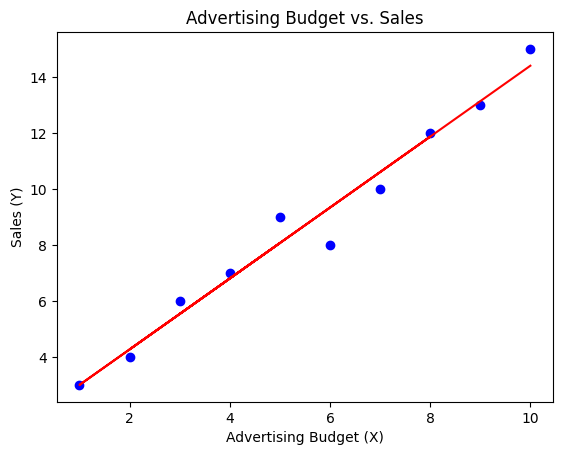

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue')
plt.plot(X, alpha + beta * X, color='red')
plt.title('Advertising Budget vs. Sales')
plt.xlabel('Advertising Budget (X)')
plt.ylabel('Sales (Y)')
plt.show()

---

<p style="color: greenyellow;"> ศวิษฐ์ โกสียอัมพร 65070507238 </p>